<a href="https://colab.research.google.com/github/only2307/APP_Project/blob/main/01_APP_Project_K19_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÁO CÁO ĐỒ ÁN MÔN HỌC: LẬP TRÌNH SONG SONG ỨNG DỤNG
#### GVHD: PHẠM TRONG NGHĨA - NGUYỄN TRẦN DUY MINH
#### THỰC HIỆN: NHÓM 01
#### DANH SÁCH THÀNH VIÊN:
  1. HUỲNH TRÍ CƠ: 1712303
  2. NGUYỄN THỊ TUYẾT: 1712892
  3. HỒ HOÀNG DUY: 19120207

- Link thùng chứa Github: https://github.com/HuynhCo111999/HandwrittenRecognitionParallel
- Link Notebook: https://colab.research.google.com/drive/1vPhiJrgGhk-S91XVENZEzVY9PRO1hZ2A?usp=sharing
- Kế hoạch phân công và làm việc nhóm: <chèn link sau>

# 1. GIỚI THIỆU ĐỀ TÀI

## 1.1 MÔ TẢ TỔNG QUAN

Ngày nay với sự phát triển của Deep Learning thì các bài toán học máy phức tạp đã dễ dàng được triển khai, giúp cho nhiều vấn đề đã được đơn giản hóa. Có thể kể đến các bài toán về các chủ đề Phân loại ảnh, Xác định đối tượng, ...

Trong đó các bài toán về nhận dạng chữ viết tay là một bài toán có nhiều ứng dụng trong nhiều khía cạnh đời sống. Chúng ta có thể ứng dụng vào việc chuyển đổi 1 bức ảnh chữ viết tay thành 1 đoạn text trong các ứng dụng.  

Sau khi tiến hành nghiên cứu 1 số bộ dữ liệu có liên quan, nhóm đã quyết định sử dụng dữ liệu về các chữ số viết tay (`MNIST`) để thuận tiện cho việc cài đặt hơn, nhóm sẽ xem xét và làm trên các bộ dữ liệu khác nếu có thời gian nhiều hơn.

## 1.2 Ý NGHĨA THỰC TẾ

## 1.3 VẤN ĐỀ SONG SONG HÓA

- Với việc có nhiều framework về Deep Learning như Tensorflow, Keras, PyTorch thì tốc độ xử lý bài toán đã có phần cải thiện khá nhiều so với phiên bản chúng ta cài đặt lại từ đầu mạng CNN. 
- Việc sử dụng các thư viện trên tuy nhanh nhưng sẽ khó cho chúng ta có thể song song hóa để chạy trên GPU, do đó việc cài đặt lại từ đầu là phương án duy nhất. Tuy nhiên tốc độ chạy thực tế là chậm hơn rất nhiều, có thể mất 1-2 ngày để train toàn bộ dữ liệu. Do đó việc song song hóa là cần thiết.

## 1.4 DATASET

- MNIST (Modified National Institute of Standards and Technology) là một bộ dữ liệu lớn gồm 70,000 ảnh xám vuông nhỏ chứa các chữ số viết tay có kích thước 28x28 pixel với các chữ số đơn viết tay từ 0 đến 9. 
- Nhiệm vụ của chúng ta là đi phân loại một hình ảnh cho trước của một chữ số viết tay vào một trong 10 lớp biểu thị các số nguyên từ 0 đến 9.
- Các mô hình hoạt động hiệu quả nhất là Deep Learning CNN đạt độ chính xác phân loại trên 99%, với tỉ lệ lỗi từ 0.4% đến 0.2% trên tập test.

# 2. CÀI ĐẶT TUẦN TỰ - SEQUENTIAL

##2.1 Ý tưởng

- Tìm hiểu và cài đặt lại các layer Neural Network dựa trên toán học và các cài đặt tham khảo, bao gồm:
1. Xây dựng lớp đa hình Base class Layer để các lớp khác kế thừa, thuận tiện cho việc cài đặt.
2. Các Layer trong mạng, bao gồm:
  - CNN
  - Max Pooling
  - Fully Connected
  - Sigmoid
  - Relu
  - Softmax
3. Và hàm tính toán độ lỗi

### Base Layer 

- Đây sẽ là Base layer mà các Layer trong mạng của chúng ta sẽ kế thừa. Mỗi layer kế thừa từ Base có 2 phương thức chính là forward từ 1 input và backward từ 1 output.

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

### CNN Layer

#### Forward

Với 1 filter F có kích thước cho trước, ta sẽ tiến hành 1 phép nhân ma trận với input là ma trận X ban đầu để tạo ra kết quả là 1 ma trận có cùng kích thước với ma trận X ban đầu. 

#### Backward

Là áp dụng quy tắc mắt xích để tính độ dốc của hàm mất mát đối với input.
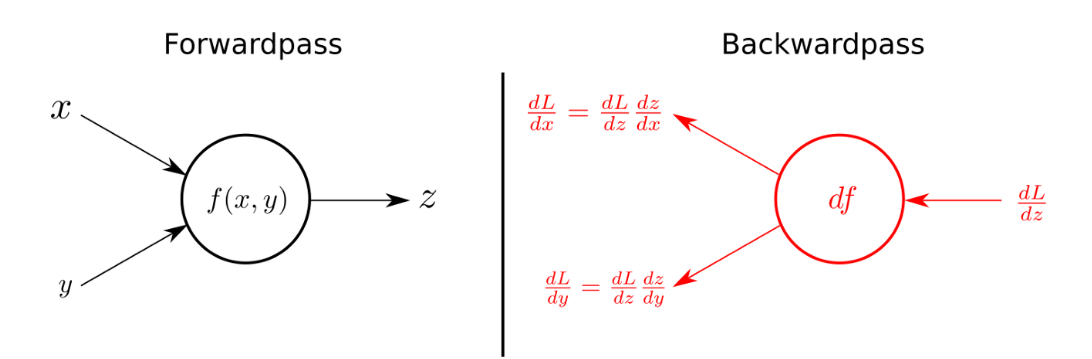

Với bước forward, giá trị `z` sẽ được tính dưới dạng kết quả của 1 hàm f(x,y) với biến đầu vào `x` và `y`. Với bước backward, độ dốc của `x` và `y` trên hàm mất mát được tính toán bằng cách áp dụng quy tắc mắt xích, bằng cách nhận 1 đạo hàm dL/dz - độ dốc của hàm mất mát đối với giá trị `z` từ phía trên.

### Pooling Layer

Pooling layer thường được dùng giữa các convolutional layer, để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model.

Gọi pooling size kích thước K * K. Input của pooling layer có kích thước H * W * D, ta tách ra làm D ma trận kích thước H * W. Với mỗi ma trận, trên vùng kích thước K * K trên ma trận ta tìm maximum hoặc average của dữ liệu rồi viết vào ma trận kết quả. Quy tắc về stride và padding áp dụng như phép tính convolution trên ảnh. Nhưng hầu hết khi dùng pooling layer thì sẽ dùng size=(2,2), stride=2, padding=0. Khi đó output width và height của dữ liệu giảm đi một nửa, depth thì được giữ nguyên 

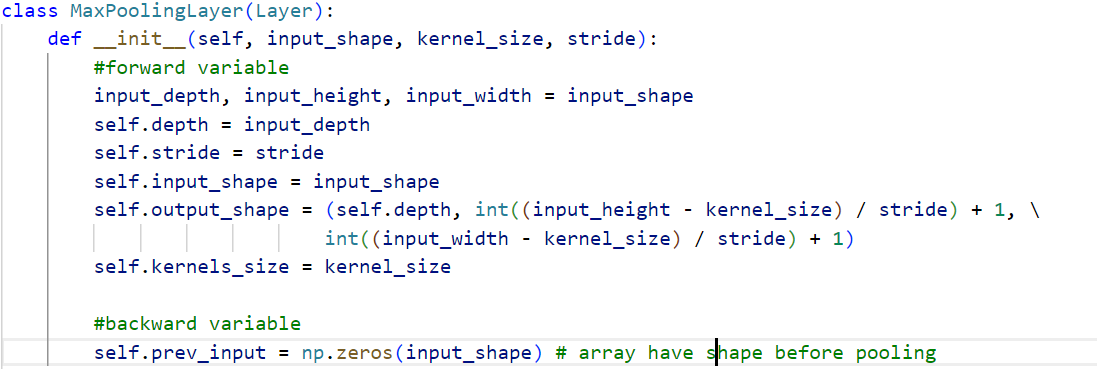

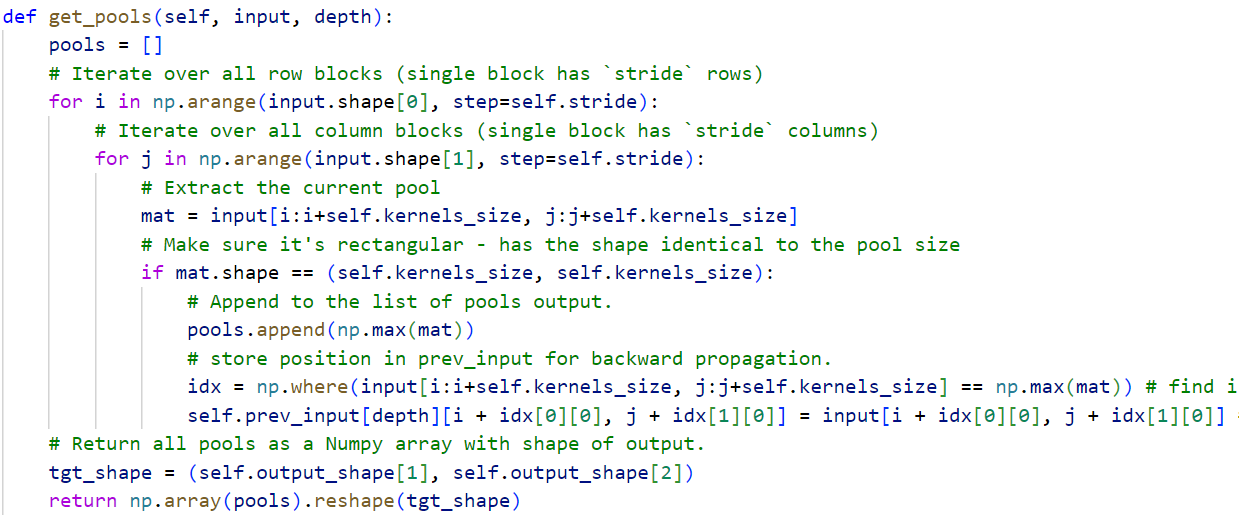

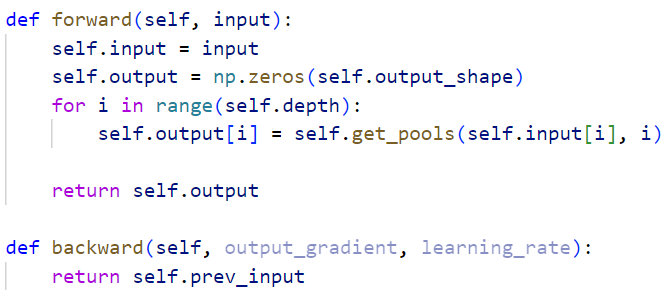

### Reshape Layer
Output của CNN có dạng ma trận n chiều, ta cần một layer gọi là Reshape để thay đổi shape sang 1 chiều.

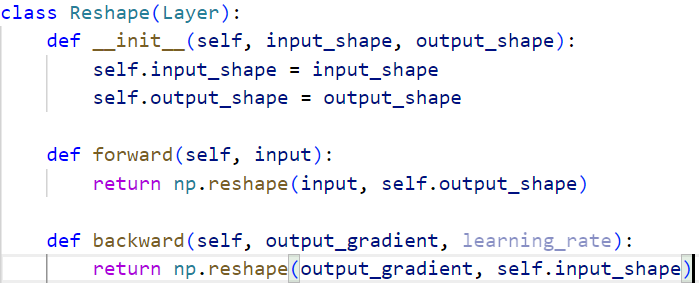

### Fully Connected Layer
- Input: Ma trận sau khi đã được Reshape.
- Output: layer cơ bản nhất: Mỗi input nơ-ron sẽ nối hết tới tất cả output nơ-ron ở layer kế tiếp nó.


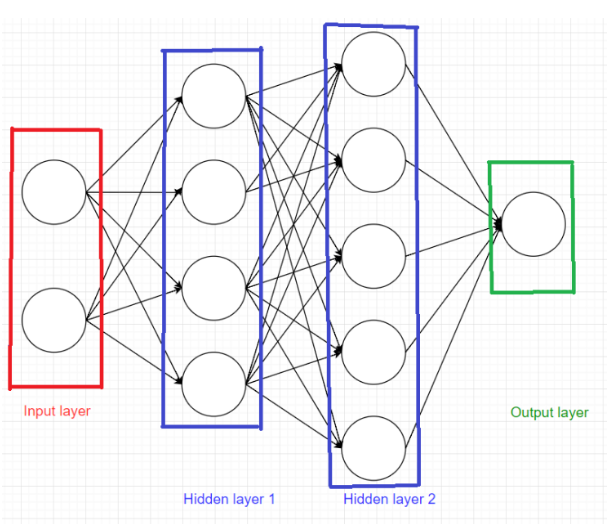

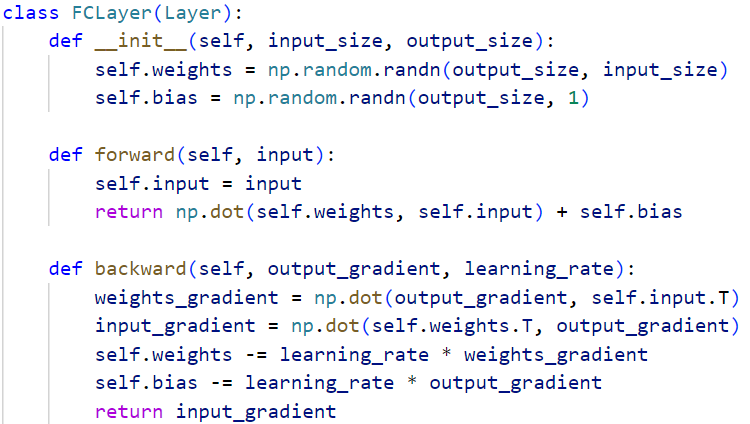

### Sigmoid

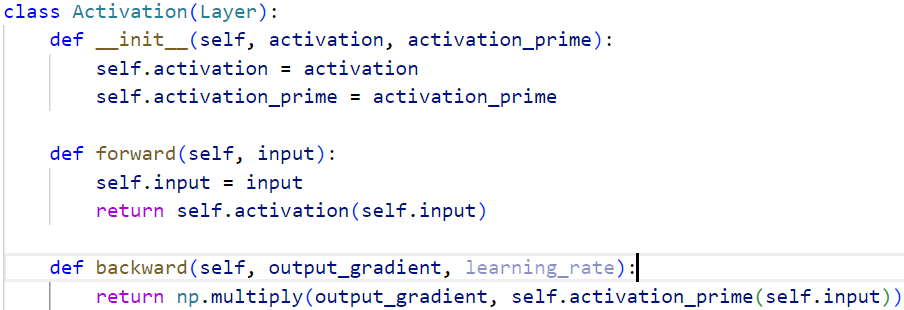

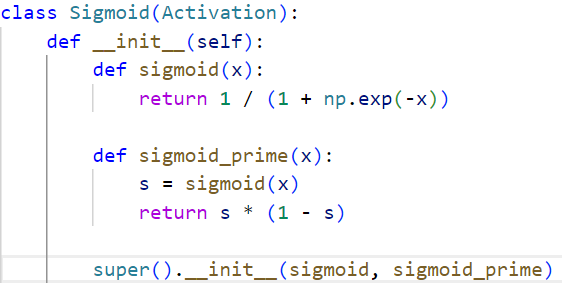

### Softmax Layer
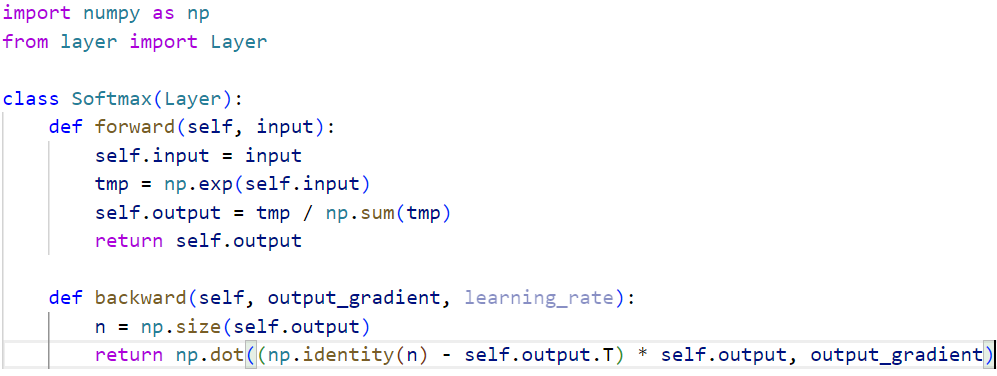

### Loss

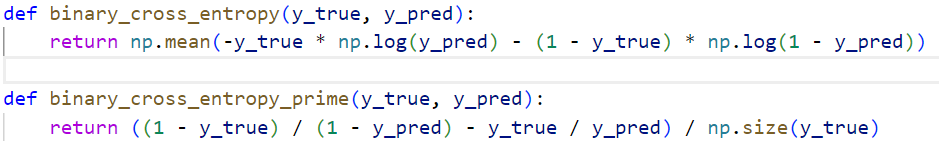

##2.2 Xây dựng network

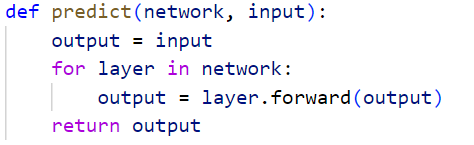

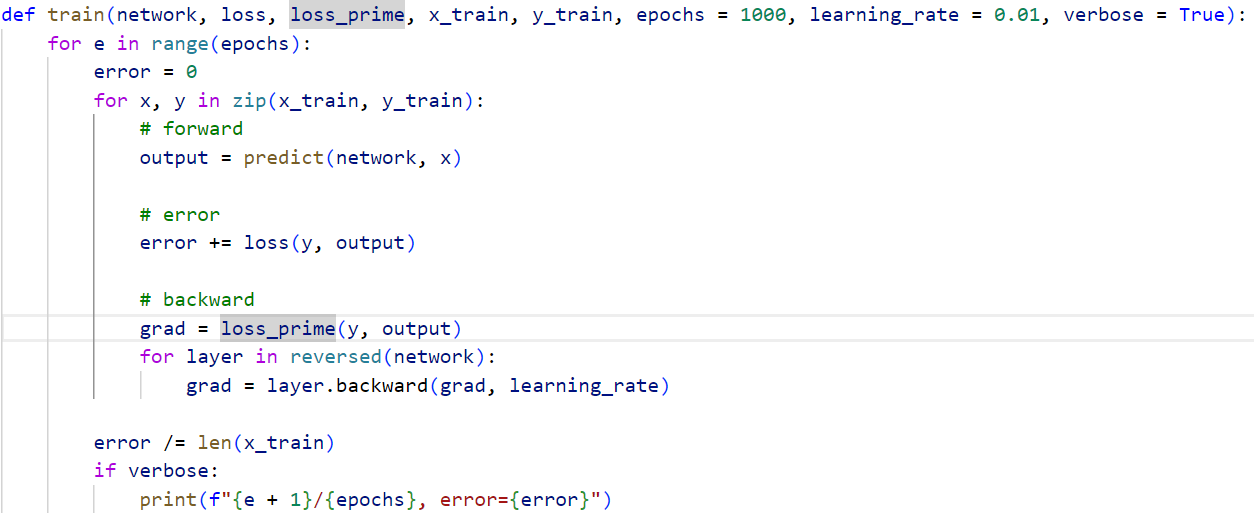

##2.3 Đánh giá

In [1]:
!git clone https://github.com/only2307/APP_Project.git

Cloning into 'APP_Project'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 42 (delta 22), reused 29 (delta 12), pack-reused 0
Unpacking objects: 100% (42/42), 12.38 KiB | 1.03 MiB/s, done.


In [2]:
!python APP_Project/sequential1.py

2023-05-15 14:33:10.647341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:33:11.537851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
11490434/11490434 [==============================] - 0s 0us/step
/content/APP_Project/sigmoid.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
1/20, error=0.5113488924042178
2/20, error=0.21929506047934505
3/20, error=0.2044666413424616
4/20, error=0.17370963270810805
5/20, error=0.1398559899510853
6/20, error=0.18376672573460312
7/20, error=0.1644706125685565
8/20, error=0.11371775451839855
9/20, error=0.12727606882523657
10/20, error=0.13306064599309222
11/20, error=0.1767021302585541
12/20, error=0.086176925189948
13/20, err

In [3]:
!python APP_Project/sequential2.py

2023-05-15 14:35:47.985253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:35:48.864496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/APP_Project/sigmoid.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
1/20, error=0.5626036638838529
2/20, error=0.21982649519853306
3/20, error=0.15050023846487487
4/20, error=0.1724174054551866
5/20, error=0.1638532256167009
6/20, error=0.1869651700632527
7/20, error=0.16162238079066782
8/20, error=0.16382588443505078
9/20, error=0.10882579345858022
10/20, error=0.10548167030667795
11/20, error=0.13518303031203158
12/20, error=0.18415344884789148
13/20, error=0.14769923518565758
14/20, error=0.10830502434154565
15/20,

#3. CÀI ĐẶT SONG SONG

Chưa cài đặt hoàn thiện

# Tham khảo

- https://www.linkedin.com/pulse/forward-back-propagation-over-cnn-code-from-scratch-coy-ulloa/
- https://nttuan8.com/bai-6-convolutional-neural-network/
- https://github.com/TheIndependentCode/Neural-Network + [bài viết](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65) + video giải thích từ kênh Youtube [này](https://www.youtube.com/watch?v=pauPCy_s0Ok&list=PLQ4osgQ7WN6PGnvt6tzLAVAEMsL3LBqpm) 